In [46]:
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
from pathlib import Path
import os
import pandas as pd
import numpy as np

In [90]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 30FA-48E2

 Directory of C:\Users\Jens\Documents\V22\DAT255\DAT255-project\nbs

25.04.2022  16:44    <DIR>          .
21.04.2022  13:25    <DIR>          ..
21.04.2022  15:40    <DIR>          -p
25.04.2022  13:36    <DIR>          .ipynb_checkpoints
25.04.2022  16:44         6ÿ370ÿ354 Downloading-and-Exploration.ipynb
25.04.2022  14:12           211ÿ725 Exploration-Testing.ipynb
25.04.2022  12:34             2ÿ083 Untitled.ipynb
               3 File(s)      6ÿ584ÿ162 bytes
               4 Dir(s)   9ÿ518ÿ538ÿ752 bytes free


In [91]:
DATA = Path('../../data')
AUDIO_TAGGING = DATA/'freesound-audio-tagging'

In [92]:
df = pd.read_csv(AUDIO_TAGGING/'train.csv')
df.head()

,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1


In [49]:
AUDIO_DIR = AUDIO_TAGGING/'audio_train'
IMG_DIR = DATA/'imgs'
IMG_DIR.mkdir(exist_ok=True)
fnames = os.listdir(str(AUDIO_DIR))

In [50]:
laugh_file = fnames[15]
label = df.loc[df['fname'].eq(laugh_file), 'label'].iloc[0]
print(label)

oboe_file = fnames[20]
label = df.loc[df['fname'].eq(oboe_file), 'label'].iloc[0]
print(label)

fart_file = fnames[31]
label = df.loc[df['fname'].eq(fart_file), 'label'].iloc[0]
print(label)

clarinet_file = fnames[40]
label = df.loc[df['fname'].eq(clarinet_file), 'label'].iloc[0]
print(label)


laugh, sr = librosa.load(str(AUDIO_DIR/laugh_file))
oboe, _ = librosa.load(str(AUDIO_DIR/oboe_file))
fart, _ = librosa.load(str(AUDIO_DIR/fart_file))
clarinet, _ = librosa.load(str(AUDIO_DIR/clarinet_file))

Laughter
Oboe
Fart
Clarinet


# Mel filter banks

In [51]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)

In [52]:
filter_banks.shape

(10, 1025)

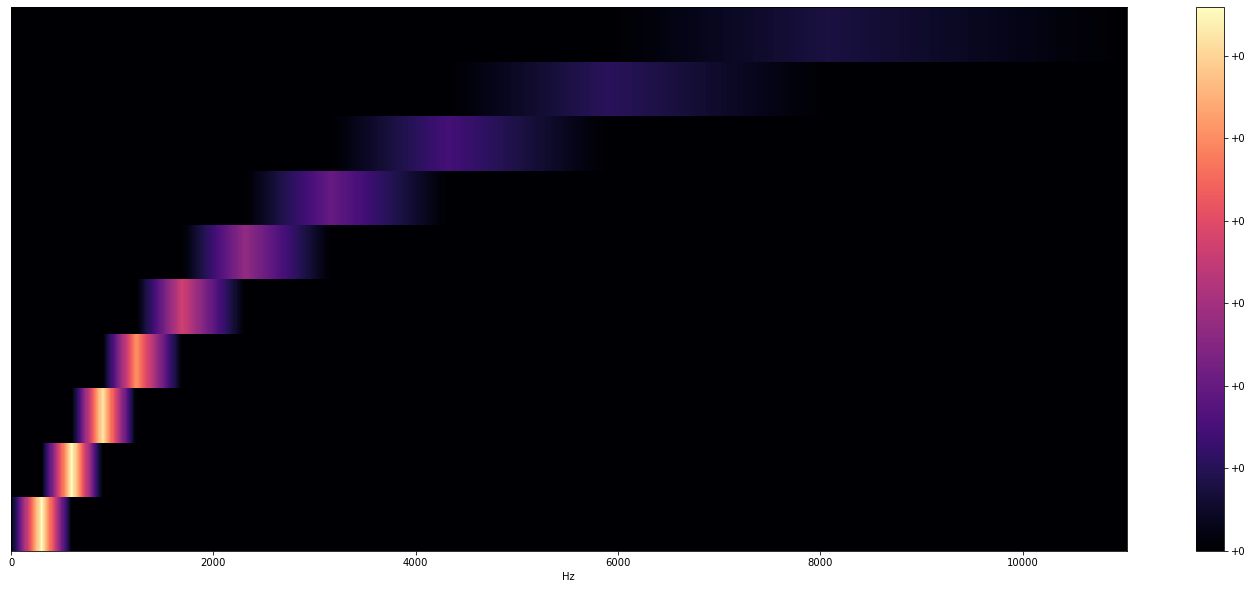

In [53]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks,
                         sr=sr,
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

# Extracting Mel Spectrogram

In [86]:
mel_spectrogram = librosa.feature.melspectrogram(laugh, sr=sr, n_fft=2048, hop_length=512, n_mels=80)

<ipython-input-86-378d5a95bb01>:1: FutureWarning: Pass y=[-7.1167517e-05 -1.6979352e-04  1.0007817e-04 ... -3.3695578e-05
 -2.4202252e-05 -4.9315372e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram = librosa.feature.melspectrogram(laugh, sr=sr, n_fft=2048, hop_length=512, n_mels=80)


In [87]:
mel_spectrogram.shape

(80, 114)

In [88]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

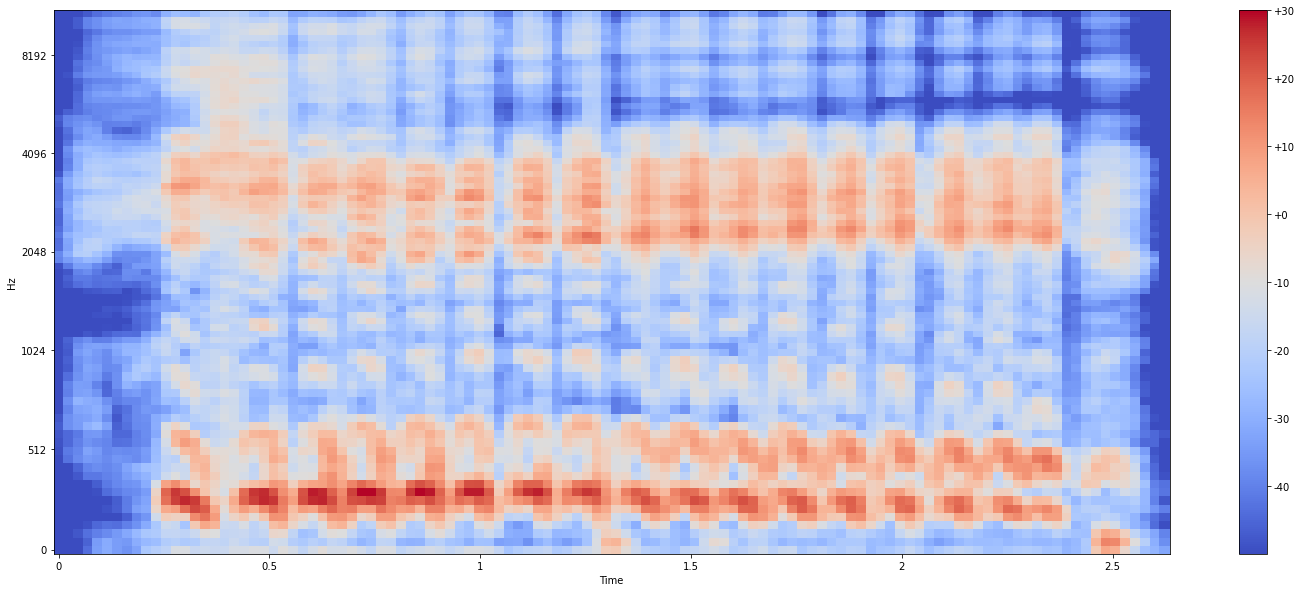

In [89]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [67]:
def log_mel_spec_tfm(fname, src_path, dst_path):
    x, sample_rate = librosa.load(src_path/fname)
    
    n_fft = 2048
    hop_length = 512
    n_mels = 80
    fmin = 20
    fmax = sample_rate / 2 
    
    mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft, 
                                                    hop_length=hop_length, 
                                                    n_mels=n_mels)
    
    #mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate)
    
    mel_spec_db = librosa.power_to_db(mel_spec_power, ref=np.max)
    
    label = df.loc[df['fname'].eq(fname), 'label'].iloc[0]
    
    dst_path = dst_path / label
    dst_path.mkdir(exist_ok=True)
    
    dst_fname = dst_path / (fname[:-4] + '.png')
    plt.imsave(dst_fname, mel_spec_db)

In [68]:
IMG_TRAIN = IMG_DIR / 'train'
IMG_TRAIN.mkdir(exist_ok=True)

<ipython-input-67-40902302cda0>:10: FutureWarning: Pass y=[-7.1167517e-05 -1.6979352e-04  1.0007817e-04 ... -3.3695578e-05
 -2.4202252e-05 -4.9315372e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec_power = librosa.feature.melspectrogram(x, sr=sample_rate, n_fft=n_fft,


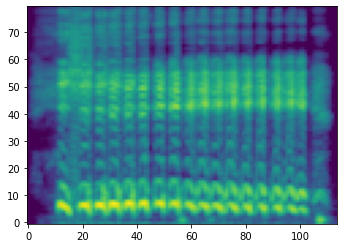

In [69]:
log_mel_spec_tfm(laugh_file, AUDIO_DIR, IMG_TRAIN)
img = plt.imread(str(IMG_TRAIN/'laughter'/(laugh_file[:-4] + '.png')))
plt.imshow(img, origin='lower');